Мы собрали данные SCSI дисков с тестового стенда, опрашивая их параметры с помощью команды `sg_logs -aa /dev/sda`, которую вызывали для каждого диска на системе каждые 15 минут. 

Затем из собранной информации мы взяли набор параметров, предложенный в статье, и сформировали датасет, который имеет следующие колонки:

| date | read total errors corrected | read total uncorrected errors | write total errors corrected | write total uncorrected errors | current temperature | accumulated start-stop cycles | accumulated load-unload cycles | accumulated power on minutes |
|--|--|--|--|--|--|--|--|--|
|2023-09-13-06-50-38|0|0|0|0|22C|68|4349|2867959|

Давайте загрузим сформированный датасет:

In [1]:
import pandas as pd

df = pd.read_csv('./dataset.txt', index_col=False)
df

,date,read total errors corrected,read total uncorrected errors,write total errors corrected,write total uncorrected errors,current temperature,accumulated start-stop cycles,accumulated load-unload cycles,accumulated power on minutes
0,2023-09-13-06-50-38,0,0,0,0,22C,68,4349.0,2867959
1,2023-09-13-06-50-38,0,0,0,0,21C,54,3790.0,2438859
2,2023-09-13-06-50-38,16,0,0,0,20C,59,3985.0,2463938
3,2023-09-13-06-50-38,0,0,0,0,21C,53,3799.0,2373736
4,2023-09-13-06-50-38,0,0,0,0,21C,49,3795.0,2373734
...,...,...,...,...,...,...,...,...,...
98170,2023-10-02-23-59-38,17,0,77,0,22C,49,4720.0,2402136
98171,2023-10-02-23-59-38,0,0,0,0,23C,49,4795.0,2402129
98172,2023-10-02-23-59-38,2,0,3,0,23C,49,4283.0,2402109
98173,2023-10-02-23-59-38,0,0,0,0,22C,49,4775.0,2402116


In [2]:
df['read total errors corrected'].value_counts()

0       64260
1       12495
2        5355
16       3570
6        3570
9688     1785
3        1785
53       1785
5        1785
17       1785
Name: read total errors corrected, dtype: int64

In [3]:
df['read total uncorrected errors'].value_counts()

0         85680
1          5355
2          3570
4          1785
183824        1
          ...  
175267        1
175252        1
175236        1
175224        1
191820        1
Name: read total uncorrected errors, Length: 1789, dtype: int64

In [4]:
df['current temperature'] = df['current temperature'].apply(lambda a: str(a).replace('C','')).astype(int)

In [5]:
df['current temperature'].value_counts()

24    19079
23    18740
25    14786
22    14221
21     9713
20     7323
26     6995
19     3184
27     2488
28      841
18      537
29      198
17       48
30       21
31        1
Name: current temperature, dtype: int64

In [6]:
df['write total errors corrected'].value_counts()

0         67830
1         14280
3          7140
4          3570
387519     1785
2          1785
77         1785
Name: write total errors corrected, dtype: int64

In [7]:
df['write total uncorrected errors'].value_counts()

0      82110
95      1785
522     1785
60      1785
62      1785
436     1785
50      1785
41      1785
67      1785
72      1785
Name: write total uncorrected errors, dtype: int64

In [8]:
df['accumulated start-stop cycles'].value_counts()

49     49980
50      8925
68      5355
52      5355
71      3570
59      3570
53      3570
65      1785
107     1785
70      1785
67      1785
60      1785
79      1785
30      1785
54      1785
69      1785
203     1785
Name: accumulated start-stop cycles, dtype: int64

In [9]:
df['accumulated load-unload cycles'].value_counts()

3650.0     253
3645.0     236
4310.0     228
3950.0     224
4011.0     216
          ... 
24293.0      1
24294.0      1
24296.0      1
24297.0      1
25621.0      1
Name: accumulated load-unload cycles, Length: 4701, dtype: int64

In [10]:
df['accumulated power on minutes'].value_counts()

2400163    6
2400073    6
2398871    6
2376394    6
2395326    6
          ..
2404920    1
2809536    1
2404993    1
2888017    1
2402136    1
Name: accumulated power on minutes, Length: 56563, dtype: int64

C:\Users\katevi\AppData\Local\Temp\ipykernel_14920\4241024751.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


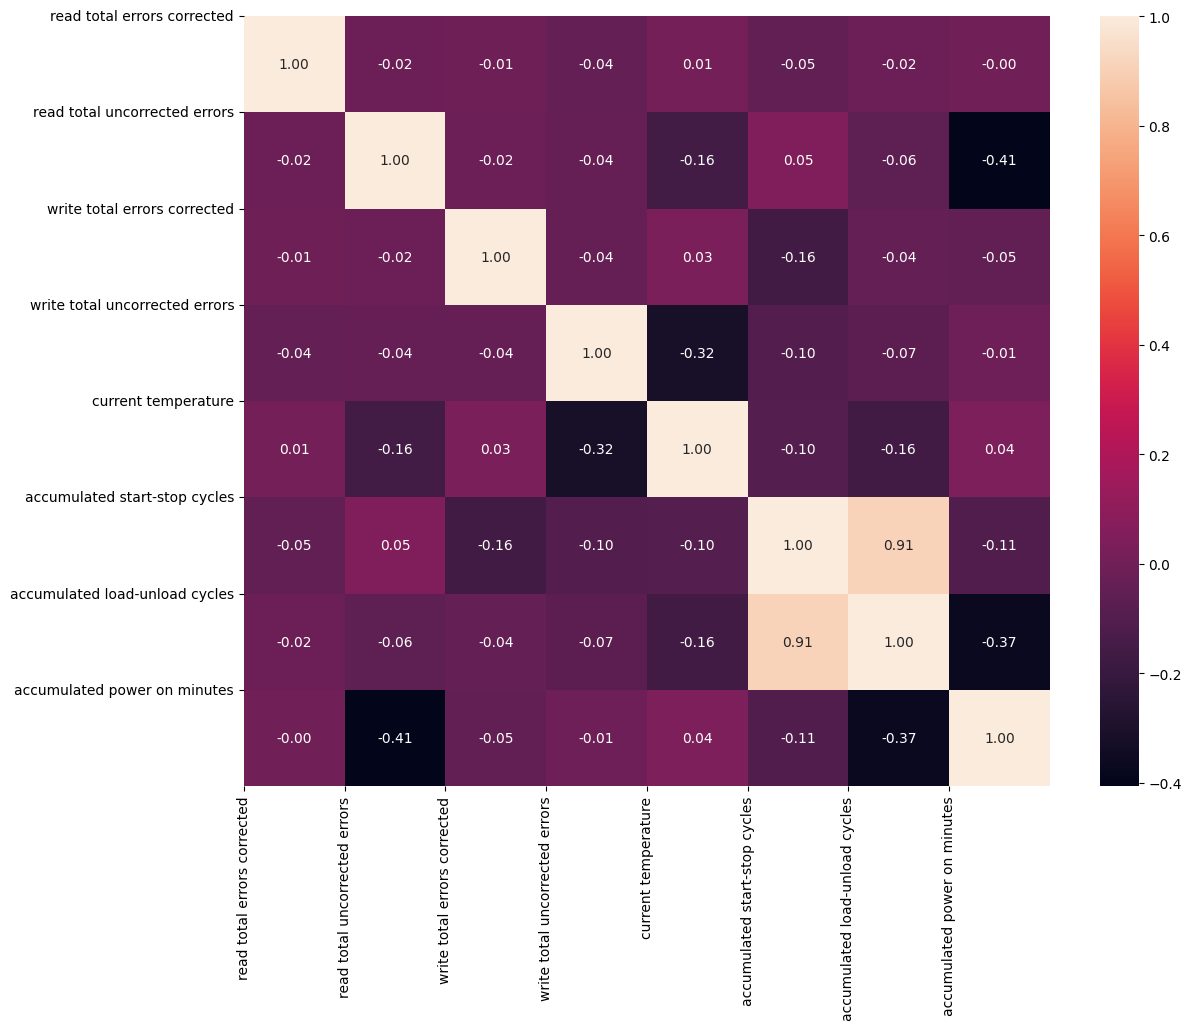

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(13, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Из матрицы корелляций можно отметить, что:
- read total uncorrected errors сильно кореллирует с accumulated power on minutes (0.41)
- accumulated start-stop cycles сильно кореллирует с accumulated load-unload cycles (0.91)
- accumulated load-unload cycles сильно кореллирует с accumulated power on minutes (0.37)
- accumulated start-stop cycles в некоторой степени кореллирует с write total errors corrected (0.16)
- current temperature сильно кореллирует с accumulated load-unload cycles (0.32)